Imports

In [ ]:
# Linear algebra
import numpy as np

# Data processing and CSV file
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Algorithms from Scikit Learn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

# Read data from CSV file
url = 'https://raw.githubusercontent.com/fribl/DataMining_ITU/master/Covid%20_Data.csv'
df = pd.read_csv(url)

#A look into the dataset

In [ ]:
# View dimensions
df.shape

(1048575, 21)

In [ ]:
# Preview dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
# Get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
# Find null values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
# View details about age
df['AGE'].describe()

count    388071.000000
mean         45.102669
std          16.438076
min           0.000000
25%          33.000000
50%          44.000000
75%          56.000000
max         120.000000
Name: AGE, dtype: float64

#Pre-processing

Feature selection

In [ ]:
# Drop columns
df = df.drop(columns=["USMER", "MEDICAL_UNIT", "OTHER_DISEASE"])

In [ ]:
# Rename columns
df.rename(columns = {'HIPERTENSION':'HYPERTENSION'}, inplace = True)
df.rename(columns = {'INTUBED':'INTUBATED'}, inplace = True)
df.rename(columns = {'DATE_DIED':'DIED'}, inplace = True)

Data cleaning

In [ ]:
df["INTUBATED"].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBATED, dtype: int64

In [ ]:
df["ICU"].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [ ]:
print("Value counts of INTUBATED column for patients that where not hospitalized: \n", df.query('PATIENT_TYPE==1')['INTUBATED'].value_counts())
print("Value counts of ICU column for patients that where not hospitalized: \n", df.query('PATIENT_TYPE==1')['ICU'].value_counts())

Value counts of INTUBATED column for patients that where not hospitalized: 
 97    848544
Name: INTUBATED, dtype: int64
Value counts of ICU column for patients that where not hospitalized: 
 97    848544
Name: ICU, dtype: int64


In [ ]:
df["PREGNANT"].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
print("Value counts of PREGNANT column for men: \n", df.query('SEX==2')['PREGNANT'].value_counts())
print("Value counts of PREGNANT column for women: \n", df.query('SEX==1')['PREGNANT'].value_counts())

Value counts of PREGNANT column for men: 
 97    523511
Name: PREGNANT, dtype: int64
Value counts of PREGNANT column for women: 
 2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64


In [ ]:
# Clean INTUBATED, ICU, and PREGNANT columns for missing values
df['INTUBATED'] = df['INTUBATED'].replace(97,2)

df['ICU'] = df['ICU'].replace(97,2)

df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)

In [ ]:
# Remove missing values (97, 98, 99)
cols = ["SEX", "PATIENT_TYPE", "INTUBATED", "PNEUMONIA", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HYPERTENSION", 
"CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "ICU"]

for col in cols:
    df = df.loc[df[col] <= 2] 

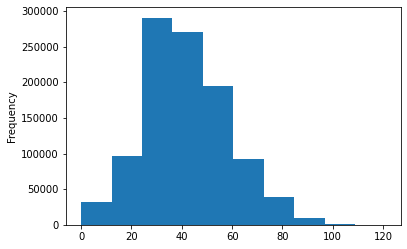

In [ ]:
# Histogram for detect outliers on AGE coloum
df['AGE'].plot.hist()

In [ ]:
# Clean columns with persons who tested positive
df = df.loc[df["CLASIFFICATION_FINAL"] < 4]

Data transformation

In [ ]:
# Transform DATE_DIED to binary values
def deathdate(x):
    if x in "9999-99-99":
        return 2
    else:
        return 1

df["DIED"] = df["DIED"].apply(lambda x : deathdate(x))

In [ ]:
# View dimensions after pre-processing
df.shape

(388071, 18)

In [ ]:
# Take sample of 2000 data points
data = df.sample(n=2000, replace=False, random_state=1)
#data = data.reset_index()
data.head()

,SEX,PATIENT_TYPE,DIED,INTUBATED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
140613,1,1,2,2,2,51,2,1,2,2,2,1,2,2,2,2,3,2
552708,1,1,2,2,2,37,2,2,2,2,2,2,2,2,2,2,3,2
550781,1,1,2,2,2,36,2,2,2,2,2,2,2,1,2,2,3,2
144503,1,1,2,2,2,38,2,2,2,2,2,2,2,2,2,2,3,2
621896,1,1,2,2,2,35,2,2,2,2,2,2,2,2,2,2,3,2


Data visualization

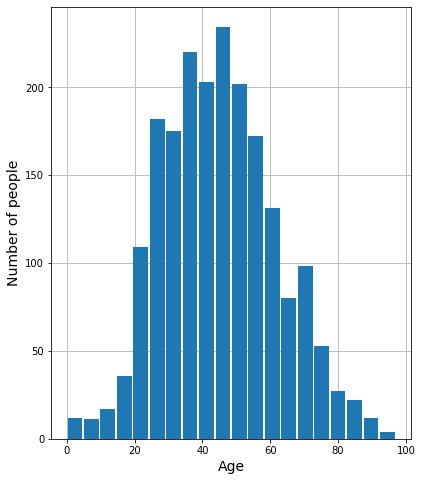

In [ ]:
# Histogram with age bin size 20
age = data[["AGE"]]
age = age.to_numpy().flatten()

fig = plt.figure(figsize=(5, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_axisbelow(True)
plt.hist(age, bins=20, rwidth=0.9, color=["tab:blue"])
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of people', fontsize=14)
plt.grid(True)

In [ ]:
# Method to visualize features in pies

def pie(data, feature, labels):
    counts = data[feature].value_counts()
    print(counts)
    one = counts[1]
    two = counts[2]
    sizes = [one, two]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["tab:blue", "skyblue"], textprops={'fontsize': 14})
    ax1.axis('equal') 

    plt.show()

2    1740
1     260
Name: DIED, dtype: int64


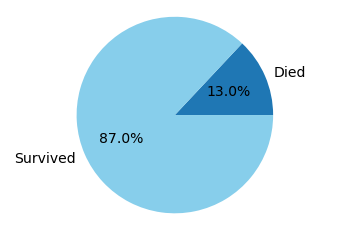

In [ ]:
# Pie chart of survivors and deaths
pie(data, "DIED", ["Died", "Survived"])

2    1070
1     930
Name: SEX, dtype: int64


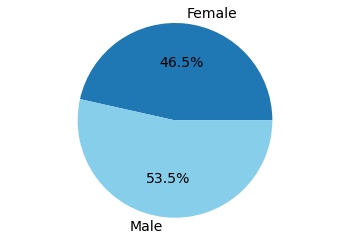

In [ ]:
# Pie chart of males and females
pie(data, "SEX", ["Female", "Male"])

1    1461
2     539
Name: PATIENT_TYPE, dtype: int64


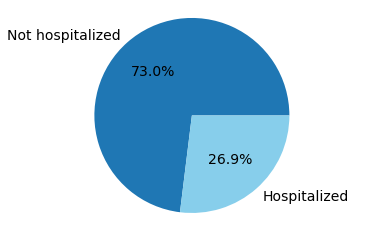

In [ ]:
# Pie chart of not hospitalized and hospitalized persons
pie(data, "PATIENT_TYPE", ["Not hospitalized", "Hospitalized"])

2    1883
1     117
Name: INTUBATED, dtype: int64


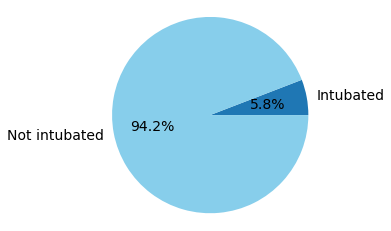

In [ ]:
# Pie chart of intubated and not intubated persons
pie(data, "INTUBATED", ["Intubated", "Not intubated"])

#Model 1: Pipeline with Decision Tree

Pipeline

In [ ]:
col_trans = ColumnTransformer(transformers=[
    ("bin_age", KBinsDiscretizer(encode='ordinal'), ["AGE"]),
    ], remainder="passthrough")

pipeline = Pipeline(steps=[
    ("column_transformer", col_trans),
    ("model", DecisionTreeClassifier())
    ])

Grid search

In [ ]:
X = data[["AGE", "SEX", "PATIENT_TYPE", "INTUBATED", "ICU", "PNEUMONIA", "PREGNANT", "DIABETES", 
"COPD", "ASTHMA", "INMSUPR", "HYPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", 
"TOBACCO"]]
y = data[["DIED"]]

# Splitting data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Grid search to find best hyperparameters
param_grid = {
    "column_transformer__bin_age__strategy": ["uniform", "quantile", "kmeans"],
    "column_transformer__bin_age__n_bins": [4,5,6,7,8,10],
    "model__criterion": ("gini", "entropy"),
    "model__min_samples_split": [2, 4, 6],
    "model__min_samples_leaf": [8, 10, 12, 14, 16, 18, 20]
}

grid = GridSearchCV(pipeline, param_grid, n_jobs=2)
model1 = grid.fit(X_train, y_train)


In [ ]:
# Print best parameters found from grid search
print("Best parameters =", model1.best_params_)
# Print bin edges
print(model1.best_estimator_[0].transformers_[0][1].bin_edges_)

Best parameters = {'column_transformer__bin_age__n_bins': 4, 'column_transformer__bin_age__strategy': 'uniform', 'model__criterion': 'entropy', 'model__min_samples_leaf': 12, 'model__min_samples_split': 2}
[array([ 0.  , 24.25, 48.5 , 72.75, 97.  ])]


##Results

Performance

In [ ]:
# Makes predictions based on test set, and calc. accuracy
y_pred = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy on test data:", accuracy)
print(class_report)

Accuracy on test data: 0.8893939393939394
              precision    recall  f1-score   support

           1       0.73      0.47      0.57       104
           2       0.91      0.97      0.94       556

    accuracy                           0.89       660
   macro avg       0.82      0.72      0.75       660
weighted avg       0.88      0.89      0.88       660



Visualization of decision tree

Depth of full tree: 8


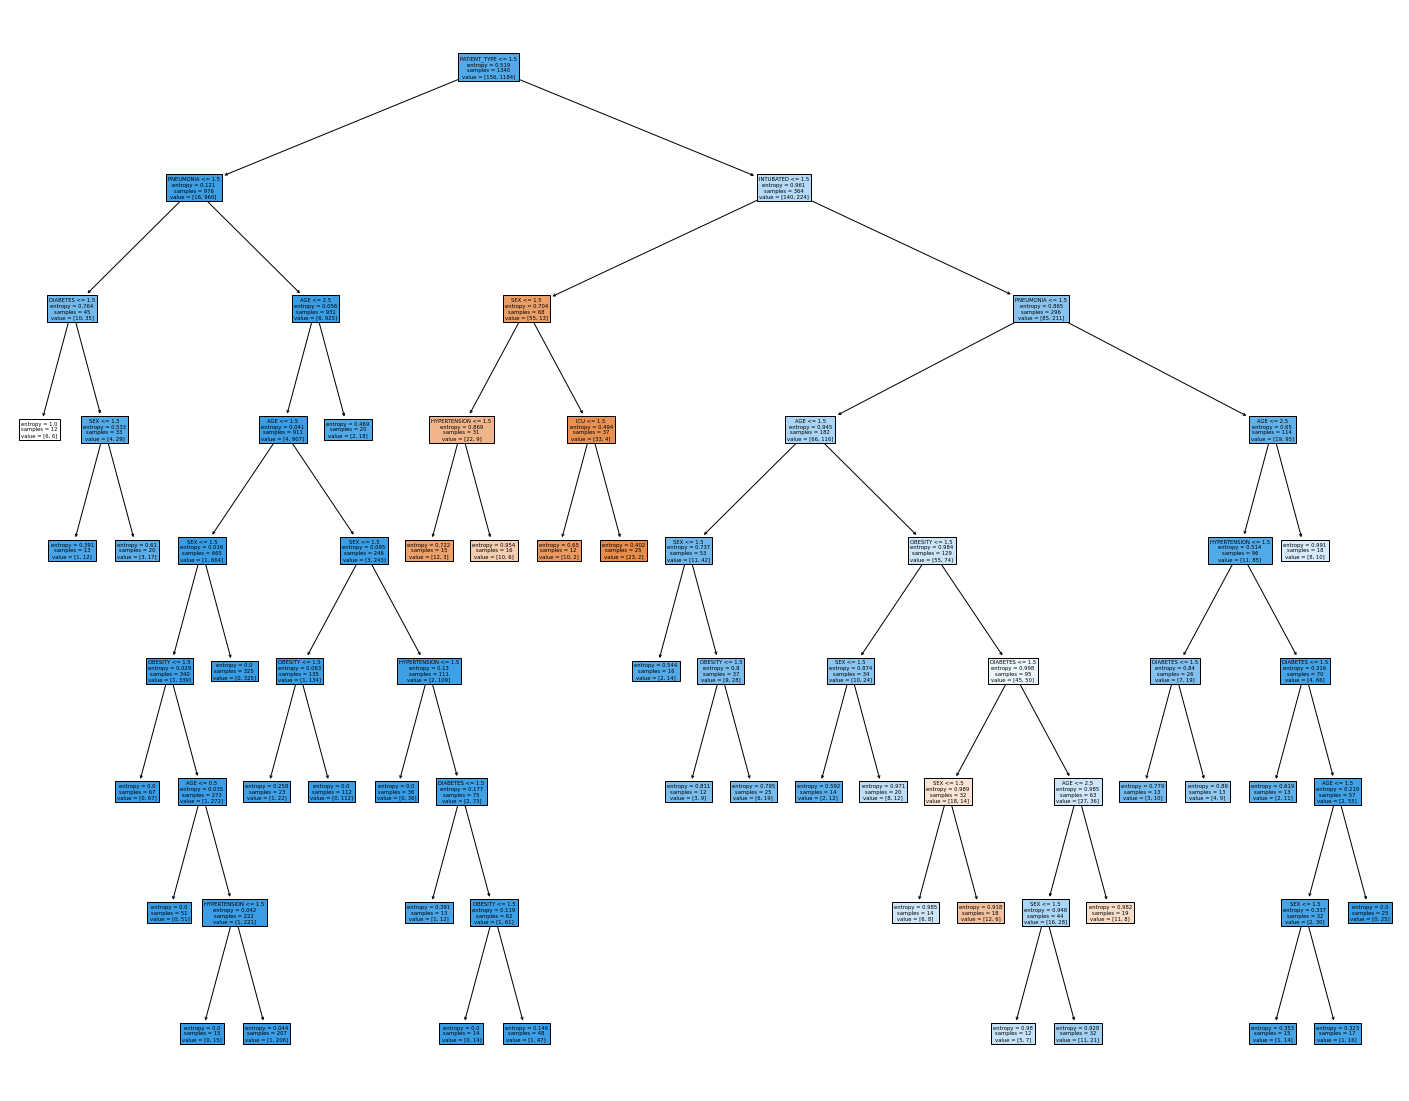

In [ ]:
print("Depth of full tree:", model1.best_estimator_[1].get_depth()) 

best = model1.best_estimator_.fit(X_train, y_train)
fn = ["AGE", "SEX", "PATIENT_TYPE", "INTUBATED", "ICU", "PNEUMONIA", "PREGNANT", "DIABETES","COPD", "ASTHMA", "INMSUPR", "HYPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC","TOBACCO"]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best[1], feature_names=fn, filled = True)

Overview of feature importance


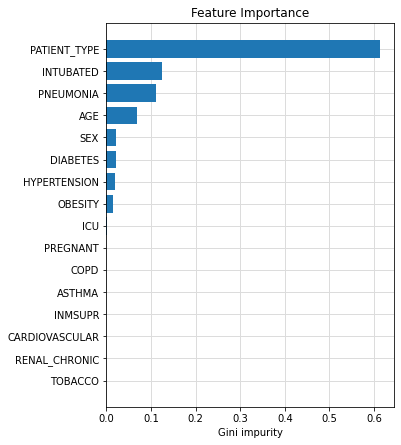

In [ ]:
def featureImportancePlot(feat_imp, df_columns):
    importance_df = pd.DataFrame(list(df_columns), feat_imp)
    importance_df.columns = ["Feature_Names"]
    importance_df["Importances"] = importance_df.index
    importance_df.index = np.arange(0,len(importance_df))
    importance_df = importance_df.sort_values(by = "Importances", ascending = False)
    importance_df      

    size = len(feat_imp)/3
    fig = plt.figure(figsize=(4, size))
    ax = fig.add_axes([0,0,1,1])
    ax.set_axisbelow(True)
    ax.set_facecolor("white")
    ax.grid(color = "gainsboro", linewidth = 1)
    ax.barh(importance_df["Feature_Names"], importance_df["Importances"], color="tab:blue")
    ax.set_xlabel('Gini impurity')
    ax.set_title('Feature Importance')
    ax.invert_yaxis()
  
    plt.show()

# Run function on first model
featureImportancePlot(model1.best_estimator_[1].feature_importances_, X.columns)

#Model 2: Pipeline with Principal Component Analysis and Decision Tree

Pipeline & Grid search

In [ ]:
def model(X, y):
    print("------------------------------")
    print("Features: {}".format(X.columns))

    search_space = [x for x in range(1, len(X.columns))]
    print()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

    #pipeline with best parameters from first model
    col_trans = ColumnTransformer(transformers=[
        ("bin_age", KBinsDiscretizer(encode='ordinal', strategy="uniform", n_bins=4), ["AGE"]),
        ], remainder="passthrough")

    pipeline_w_pca = Pipeline(steps=[
        ("column_transformer", col_trans),
        ("scalar", StandardScaler()),
        ("pca", PCA()),
        ("model", DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=12))
        ])
        
    # Grid search to find best hyperparameters
    param_grid = {
        "pca__n_components": search_space
    }

    # Search best model
    grid = GridSearchCV(pipeline_w_pca, param_grid, n_jobs=2)
    model = grid.fit(X_train, y_train)
    best_model = model.best_estimator_.fit(X_train, y_train)
    
    # Performance of the best model
    y_pred = model.best_estimator_.predict(X_test)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print("Search space for PCA n_components:", search_space, "| Best parameters =", model.best_params_, "| ACCURACY:", accuracy)
    
    return best_model, report

##Results

Performance

In [ ]:
# For running experiments:
# pca_X_all = data[["AGE", "SEX", "PATIENT_TYPE", "INTUBATED", "ICU", "PNEUMONIA", "PREGNANT", "DIABETES", 
# "COPD", "ASTHMA", "INMSUPR", "HYPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", 
# "TOBACCO"]]

pca_X_8f = data[["PATIENT_TYPE", "INTUBATED", "PNEUMONIA","AGE", "SEX", "DIABETES", "HYPERTENSION", "OBESITY"]]
pca_X_7f = data[["PATIENT_TYPE", "INTUBATED", "PNEUMONIA","AGE", "SEX", "DIABETES", "HYPERTENSION"]]
pca_X_6f = data[["PATIENT_TYPE", "INTUBATED", "PNEUMONIA","AGE", "SEX", "DIABETES"]]
pca_X_5f = data[["PATIENT_TYPE", "INTUBATED", "PNEUMONIA","AGE", "SEX"]]
pca_X_4f = data[["PATIENT_TYPE", "INTUBATED", "PNEUMONIA","AGE",]]

pca_y = data[["DIED"]] 

#model_all, report_all, X_train_all = model(pca_X_all, pca_y)
best_model_8, report_8 = model(pca_X_8f, pca_y)
best_model_7, report_7 = model(pca_X_7f, pca_y)
best_model_6, report_6 = model(pca_X_6f, pca_y)
best_model_5, report_5 = model(pca_X_5f, pca_y)
best_model, report_4 = model(pca_X_4f, pca_y)

------------------------------
Features: Index(['PATIENT_TYPE', 'INTUBATED', 'PNEUMONIA', 'AGE', 'SEX', 'DIABETES',
       'HYPERTENSION', 'OBESITY'],
      dtype='object')

Search space for PCA n_components: [1, 2, 3, 4, 5, 6, 7] | Best parameters = {'pca__n_components': 2} | ACCURACY: 0.8666666666666667
------------------------------
Features: Index(['PATIENT_TYPE', 'INTUBATED', 'PNEUMONIA', 'AGE', 'SEX', 'DIABETES',
       'HYPERTENSION'],
      dtype='object')

Search space for PCA n_components: [1, 2, 3, 4, 5, 6] | Best parameters = {'pca__n_components': 6} | ACCURACY: 0.8742424242424243
------------------------------
Features: Index(['PATIENT_TYPE', 'INTUBATED', 'PNEUMONIA', 'AGE', 'SEX', 'DIABETES'], dtype='object')

Search space for PCA n_components: [1, 2, 3, 4, 5] | Best parameters = {'pca__n_components': 5} | ACCURACY: 0.8772727272727273
------------------------------
Features: Index(['PATIENT_TYPE', 'INTUBATED', 'PNEUMONIA', 'AGE', 'SEX'], dtype='object')

Search space for 

In [ ]:
# Print report from experiment with 4 features, because it produced the best accuracy
print(report_4)

              precision    recall  f1-score   support

           1       0.78      0.45      0.57       104
           2       0.91      0.98      0.94       556

    accuracy                           0.89       660
   macro avg       0.84      0.71      0.76       660
weighted avg       0.89      0.89      0.88       660



Visualization of Decision Tree after PCA

Depth of full tree: 6


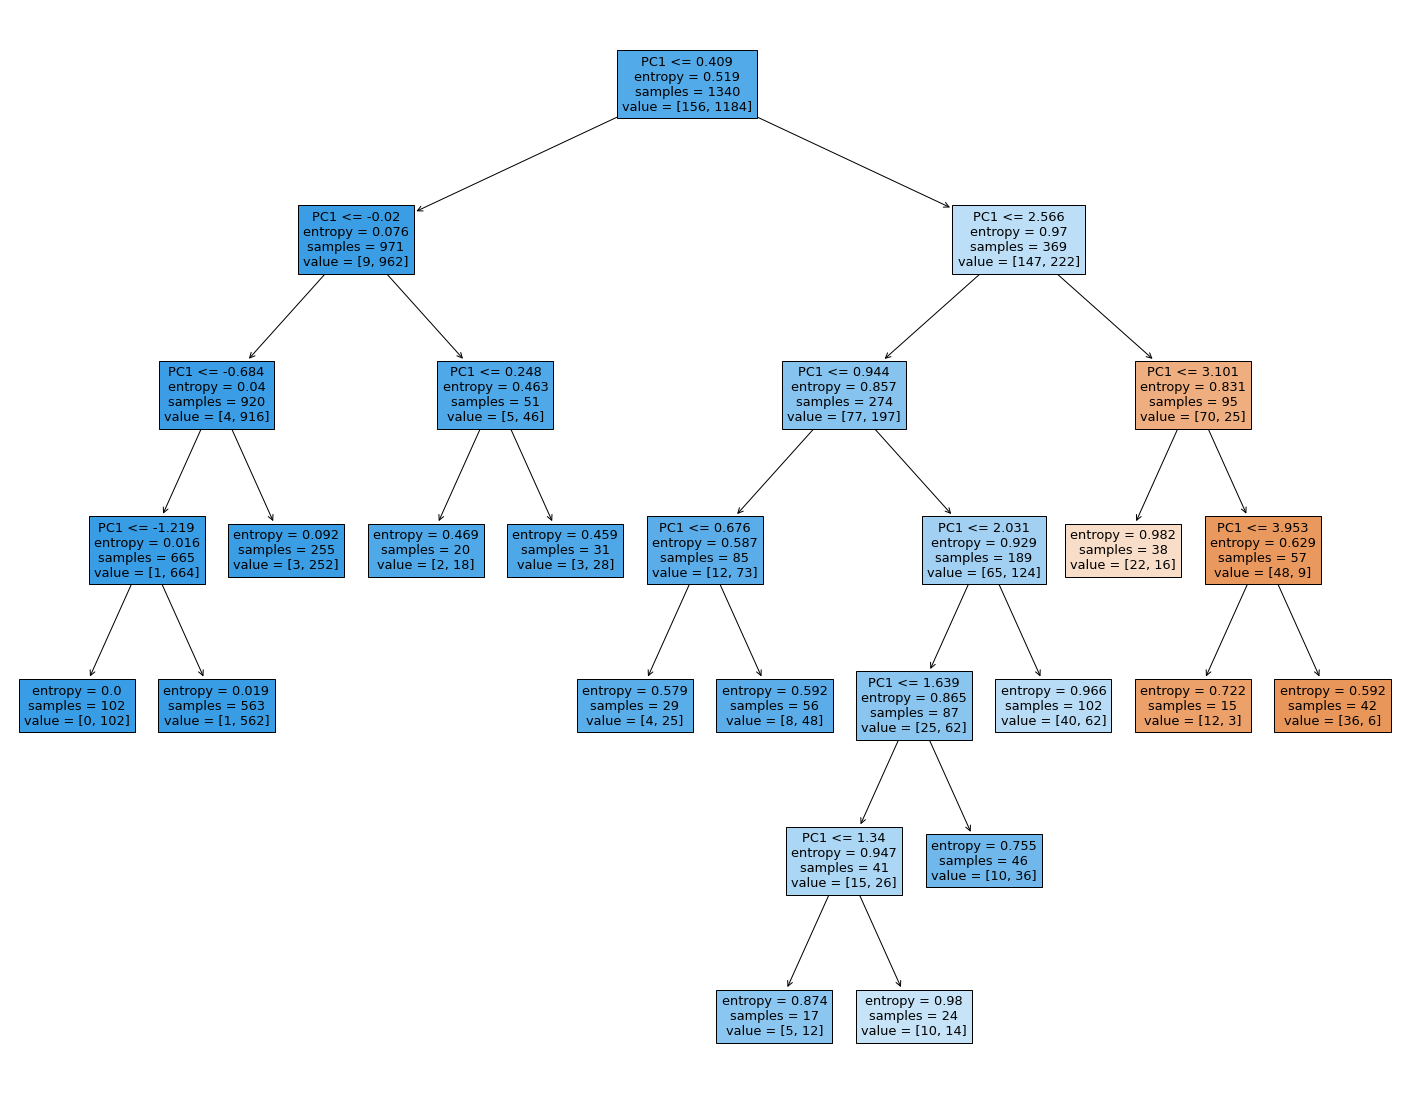

In [ ]:
print("Depth of full tree:", best_model[3].get_depth())

fn = ["PC1"]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model[3], feature_names=fn, filled = True)